In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [2]:
# function for obtaining k_x,k_y
def f(N):
    n = np.arange(0,N,1)
    k_x = np.zeros(len(n))
    
    for i in range (len(n)):
        k_x[i] = (2*np.pi*n[i])*(1./(N*a))
    
    k_y = [[0]*N for _ in range (N)]   
    for i in range (N):
        for j in range (N):
            k_y[i][j]= ((4*np.pi*n[j]/(N)) - (2*np.pi*n[i]/N))* (1./(np.sqrt(3)*a))
    return k_x, k_y

#(k_x[i],k_y[i][j]) are the coordinates in momentum space.
#The size of the grid is N X N = N^2 lattice points

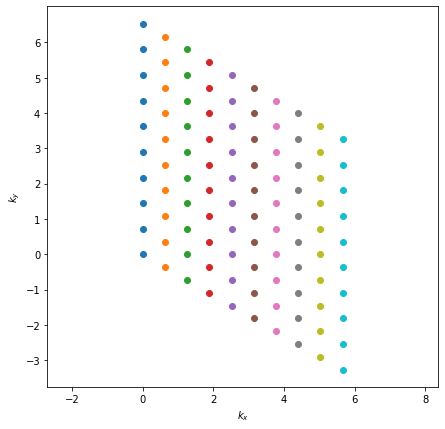

In [3]:
# Checking through the lattice 
a = 1
k_x, k_y = f(10)
plt.figure(figsize=(7,7))
for i in range(len(k_y)):
    x = k_x[i]*np.array([1]*len(k_y))
    plt.scatter(x,k_y[i])
    plt.yticks(np.arange(-3,7,1))
    plt.axis('equal')
    plt.xlabel('$ k_x $')
    plt.ylabel('$ k_y $')

In [4]:
# function for E_k(As 2D array)
def epsilon_k2(X, k_x, k_y, N):             
    E_k = [[0]*N for _ in range (N)]    #E_k is a 2D matrix of size N X N
    for i in range (N):
        for j in range (N):
            E_k[i][j]=-8*X*J*(np.cos(k_x[i]*a)+np.cos((k_x[i]*a/2)+(k_y[i][j]*np.sqrt(3)*a/2))+np.cos((k_x[i]*a/2)-(k_y[i][j]*np.sqrt(3)*a/2)) )        
    return E_k    
                 

In [5]:
# function for calculating K (if k_y is 2D array )
def K2(k_x, k_y):
    K =[[0]*len(k_x) for _ in range (len(k_x))]
    for i in range (len(k_x)):
        for j in range(len(k_y)):
            K[i][j]= np.sqrt(k_x[i]**2+k_y[i][j]**2)
    return K

In [6]:
#Define fermi function
def fermi(e_k, mu, T):
    k_b =1
    b = 1./(k_b*T)
    d = (e_k -mu)*b
    if (d>10):
        return (0)
    else:
        return (1./(m.exp((e_k-mu)*b)+1))

def fermi2(e_k, mu, T):
    k_b =8.617*10**(-5)
    b = 1./(k_b*T)
    d = (e_k -mu)*b
    if (d>0):
        return (m.exp(-d)/(m.exp(-d)+1))
    if (d<0):
        return (1./(m.exp(d)+1))


Maximum of E_k =  598.9731526092265
Minimum of E_k =  -1200.0


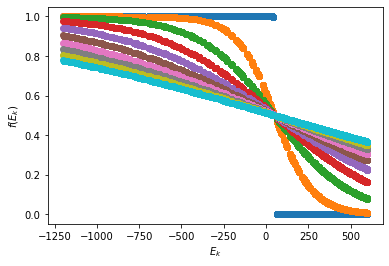

In [10]:
# Checking the behaviour of fermi function
a=1
N = 50          # Lattice has N^2 sites
X = 50
mu = 50
J =1

k_x, k_y = f(N)
e_k = []
E_k = epsilon_k2(X, k_x, k_y, N)

for i in range (N):
    for j in range (N):
        e_k.append((E_k[i][j]))

e_k = np.array(e_k)

temp = np.linspace(1, 1000, 10)

Y=[[0]*len(e_k) for _ in range (len(temp))]

for i in range (len(temp)):
    for j in range (len(e_k)):
        Y[i][j] = fermi(e_k[j], mu, temp[i])

for i in range (len(temp)):
    plt.scatter(e_k, Y[i])

plt.xlabel('$E_k$')
plt.ylabel('$f(E_k)$')
print('Maximum of E_k = ',np.max(E_k))
print('Minimum of E_k = ', np.min(E_k))

In [7]:
# Define consistent eq 1
def Seq_1(X, mu, T):
    sol = 0
    E_k = epsilon_k2(X, k_x, k_y, N)
    for i in range (len(k_x)):
        for j in range (len(k_x)):
            sol = sol + fermi (E_k[i][j], mu, T)
    return (sol/(N**2))

#Define consistent eq 2
def Seq_2(X, mu, T):
    sol =0
    c = 3
    E_k = epsilon_k2(X, k_x, k_y, N)
    for i in range(len(k_x)):
        for j in range(len(k_x)):
            sol = sol + (fermi(E_k[i][j], mu, T)*(np.cos(k_x[i]*a)+np.cos(k_x[i]*a*0.5 + k_y[i][j]*a*np.sqrt(3)*0.5)+np.cos(k_x[i]*a*0.5 - k_y[i][j]*a*np.sqrt(3)*0.5)))
    return (sol/(N*N*c))

In [8]:
# Optimization scheme

from scipy.optimize import minimize

# Consider an array 
#  x = [X, mu] as variables and consider objective function

# Defining the objective function
def objective(x):
    X = x[0]
    mu = x[1]
    return ((4*Seq_1(X, mu, T)-1)**2 + (Seq_2(X, mu, T) - X)**2)

def optimization(x0):
    #Bounds
    bounds =[(-10,10),(-6,6)]
    initial_guess =x0
    #performing optimization
    opt = minimize(objective, initial_guess, method = 'SLSQP', bounds=bounds)
    return(opt)

In [9]:
# Global Variables
a=1
J=1
N=100

In [10]:
k_x, k_y = f(N)

In [22]:
Temp= np.linspace(0.01,2.5,25)
chem=[]
mean=[]

x_0 = [0.2, -1]

for i in range(len(Temp)):
    T = Temp[i]
    opt = optimization(x_0)
    #print("The temp=", Temp[i])
    #print("The function value is", opt.fun)
    #print("The solution is ", opt.x)
    #print('\n')
    mean.append(opt.x[0])
    chem.append(opt.x[1])
    x_0 = opt.x

Text(0, 0.5, '$\\mu$')

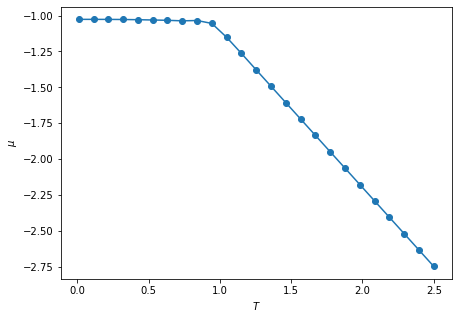

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(Temp, chem)
plt.plot(Temp, chem)
plt.xlabel('$T$')
plt.ylabel('$\mu$')

Text(0, 0.5, '$\\chi$')

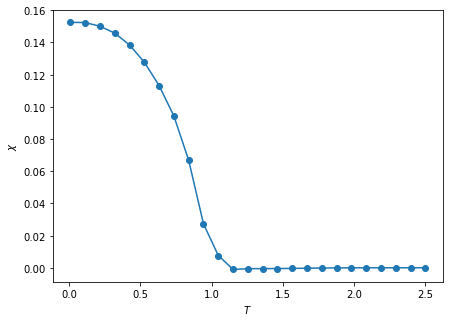

In [24]:
plt.figure(figsize=(7,5))
plt.scatter(Temp, mean)
plt.plot(Temp, mean)
plt.xlabel('$T$')
plt.ylabel('$\chi$')

Text(0, 0.5, '$t$')

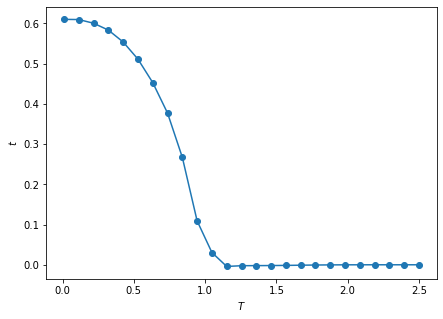

In [25]:
plt.figure(figsize=(7,5))
plt.scatter(Temp, np.array(mean)*4)
plt.plot(Temp, np.array(mean)*4)
plt.xlabel('$T$')
plt.ylabel('$t$')

In [15]:
Temp= np.linspace(0.01,2.5,35)
chem=[]
mean=[]

x_0 = [0.1, -1]

for i in range(len(Temp)):
    T = Temp[i]
    opt = optimization(x_0)
    #print("The temp=", Temp[i])
    #print("The function value is", opt.fun)
    #print("The solution is ", opt.x)
    #print('\n')
    mean.append(opt.x[0])
    chem.append(opt.x[1])
    x_0 = opt.x

Text(0, 0.5, '$\\mu$')

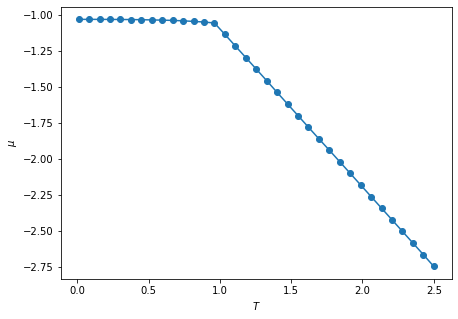

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(Temp, chem)
plt.plot(Temp, chem)
plt.xlabel('$T$')
plt.ylabel('$\mu$')

Text(0, 0.5, '$\\chi$')

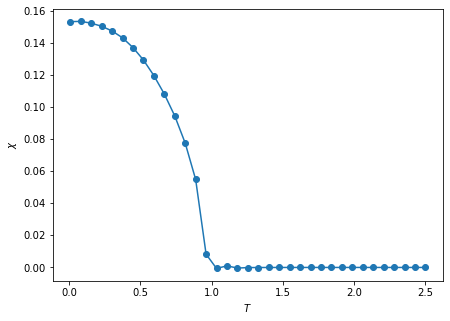

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(Temp, mean)
plt.plot(Temp, mean)
plt.xlabel('$T$')
plt.ylabel('$\chi$')